<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Compara%C3%A7%C3%A3o_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install investpy 

     |████████████████████████████████| 4.4 MB 5.0 MB/s 
     |████████████████████████████████| 235 kB 48.8 MB/s 
     |████████████████████████████████| 6.4 MB 38.2 MB/s 
     |████████████████████████████████| 503 kB 52.4 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=8358863d001026fbb4034efe1975dc1221802fe13019b36c1bf616f1d57200bc
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import investpy as inv
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt 
import datetime as dt

In [4]:
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

pais = 'united states'

tipo_etf = 'bond'

04/04/2022


In [5]:
# obtendo a lista de todos os ETFs dos Estados Unidos no Investing.com

lista_etf = inv.get_etfs_dict(pais)


In [6]:
# Para buscar informações especificas de cada ETF 
'''
for i in range(len(lista_etf)):
    if (lista_etf[i]['isin']=='US46434V6130'):
        info = lista_etf[i]['name']
'''

#Obetndo lista com o nome de todos os ETFs
nome_etf = []

for i in range(len(lista_etf)):
  if (lista_etf[i]['asset_class']== tipo_etf):
    nome_etf.append(lista_etf[i]['name'])  

In [7]:
nome_etf_filtro  = []
filtro = [s for s in nome_etf if "High Yield" in s]

for i in range(len(nome_etf)):
  if(nome_etf[i] == any(filtro)):
    nome_etf.drop(nome_etf[i])

In [8]:
lista_nomes = []

r = len(nome_etf)//10
for i in range(r+1):
  lista_nomes.append(nome_etf[(i*10):((i*10)+10)])



In [9]:
#lista_nomes

In [10]:
painel = pd.DataFrame()

contador = 0 

for i in range(len(lista_nomes)):
  for j in lista_nomes[i]:
    try:
      painel[j] = inv.get_etf_historical_data(etf = j,country = pais, from_date = '01/01/2015',to_date = hoje)['Close']
      contador = contador + 1
      time.sleep(2)
    except:
      pass


/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Munich".
  Warning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8:

In [11]:
retorno_painel = painel.pct_change()

In [12]:

painel

,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,iShares iBonds Dec 2025 Term Muni Bond,iShares Inflation Hedged Corporate Bond,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,NaN,NaN,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
2015-01-05,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,NaN,NaN,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2015-01-06,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,NaN,NaN,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
2015-01-07,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,NaN,NaN,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
2015-01-08,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,NaN,NaN,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-29,28.66,46.69,97.76,NaN,9.225,23.76,48.76,14.51,26.58,29.09,...,46.48,27.84,NaN,49.60,NaN,NaN,66.12,48.39,45.13,46.09
2022-03-30,28.88,46.82,97.72,NaN,9.235,23.68,48.84,14.52,26.63,29.06,...,46.52,27.95,NaN,49.51,NaN,NaN,65.92,48.32,44.99,45.99
2022-03-31,28.85,46.90,97.73,NaN,9.232,23.70,48.79,14.53,26.66,29.02,...,46.44,27.97,NaN,49.34,NaN,NaN,66.07,48.21,44.83,45.94


In [13]:
# import sys

# retorno_painel.to_csv(sys.stdout, sep = ',')

In [14]:
lista_nomes[1][1]

'iShares $ Short Duration Corp Bond Acc'

In [15]:
import io
import requests

url= 'https://github.com/Edu-Moreira/Estudos-de-Python/raw/main/Dados/Dados%20IE.xlsx'
myfile = requests.get(url)

df=pd.read_excel(myfile.content)
print(df)

           Data  USD LC07TRUU   USD SPTR   USD M1CXBRU   USD MIMUEMRN   \
0    1998-12-31       212.0865   1670.006        477.68      267.04001   
1    1999-01-04       212.0641   1668.521        486.52      270.20279   
2    1999-01-05       211.8054   1691.253        489.26      272.39230   
3    1999-01-06       212.1331   1729.083        496.11      278.48300   
4    1999-01-07       211.7084   1725.640        494.54      279.80511   
...         ...            ...        ...           ...            ...   
5790 2022-01-18       616.7014   9595.926       1588.46     1758.11600   
5791 2022-01-19       618.1821   9503.135       1580.24     1755.67800   
5792 2022-01-20       618.8629   9398.964       1590.57     1776.91891   
5793 2022-01-21       620.5297   9221.282       1564.14     1759.46330   
5794 2022-01-24       619.7807   9246.837       1521.55     1727.05400   

      USD LG38TRUU  USD SPTRSMCP   
0         244.2719        186.094  
1         244.2719        186.094  
2  

In [18]:
df.rename(columns= {'Data': 'Date'}, inplace = True)
df_benchmark  = df[['Date','USD LG38TRUU']]
df_benchmark

,Date,USD LG38TRUU
0,1998-12-31,244.2719
1,1999-01-04,244.2719
2,1999-01-05,244.2719
3,1999-01-06,244.2719
4,1999-01-07,244.2719
...,...,...
5790,2022-01-18,491.6966
5791,2022-01-19,491.8776
5792,2022-01-20,493.2359
5793,2022-01-21,493.8587


In [20]:
tot_df = pd.merge(df_benchmark,painel, on = 'Date')
tot_df

,Date,USD LG38TRUU,Peritus High Yield,Newfleet Multi-Sector Income,AdvisorShares Sage Core Reserves,Madrona Global Bond,Anfield Universal Fixed Income,ALPS RiverFront Strategic Income,American Century Diversified Corporate Bond,Arrow Dow Jones Global Yield,...,WisdomTree Barclays Interest Rate Hedge US Aggrega,WisdomTree Emerging Markets Local Debt,WisdomTree Negative Duration High Yield Bond,WisdomTree Fundamental U.S. High Yield Corporate B,WisdomTree Barclays Negative Duration US Aggregate,WisdomTree Yield Enhanced Global Aggregate Bond,WisdomTree Emerging Markets Corporate Bond,Xtrackers Low Beta High Yield Bond,Xtrackers High Beta High Yield Bond,Xtrackers Short Duration High Yield
0,2015-01-02,444.7735,41.34,49.12,NaN,25.53,NaN,24.90,NaN,24.08,...,49.29,41.34,21.32,NaN,NaN,NaN,71.39,NaN,NaN,NaN
1,2015-01-05,443.2462,40.86,49.14,NaN,25.64,NaN,24.87,NaN,23.86,...,49.27,40.92,21.12,NaN,44.78,NaN,70.99,NaN,NaN,NaN
2,2015-01-06,445.2654,40.20,49.16,NaN,25.53,NaN,24.70,NaN,23.71,...,49.02,40.90,21.12,NaN,44.33,NaN,70.23,NaN,NaN,NaN
3,2015-01-07,441.3983,40.38,49.18,NaN,25.66,NaN,24.83,NaN,23.93,...,49.10,41.24,NaN,NaN,44.49,NaN,70.78,NaN,NaN,NaN
4,2015-01-08,441.2247,40.63,49.27,NaN,25.69,NaN,24.87,NaN,24.30,...,49.18,41.46,21.39,NaN,44.94,NaN,71.33,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,2022-01-18,491.6966,30.74,48.10,98.39,NaN,9.45,24.47,50.98,14.99,...,46.60,29.69,NaN,51.63,NaN,NaN,72.31,49.87,46.90,47.11
1730,2022-01-19,491.8776,30.81,48.12,98.32,NaN,9.52,24.42,51.01,15.00,...,46.57,29.97,NaN,51.62,NaN,NaN,72.47,49.86,46.89,47.10
1731,2022-01-20,493.2359,31.00,48.12,98.32,NaN,9.50,24.32,50.97,14.93,...,46.55,30.00,NaN,51.43,NaN,NaN,72.58,49.75,46.75,47.00
1732,2022-01-21,493.8587,30.82,48.19,98.36,NaN,9.51,24.34,51.10,14.81,...,46.51,30.03,NaN,51.46,NaN,NaN,72.57,49.73,46.70,46.99


In [94]:
corr_etfs = tot_df.corr()
gla_etfs = corr_etfs['USD LG38TRUU']

etfs_eleitos = gla_etfs.loc[gla_etfs > 0.95]

a = list(etfs_eleitos.index)
a.append('Date')


In [95]:
etfs_eleitos

USD LG38TRUU                                 1.000000
SPDR Barclays International Treasury Bond    0.960604
Name: USD LG38TRUU, dtype: float64

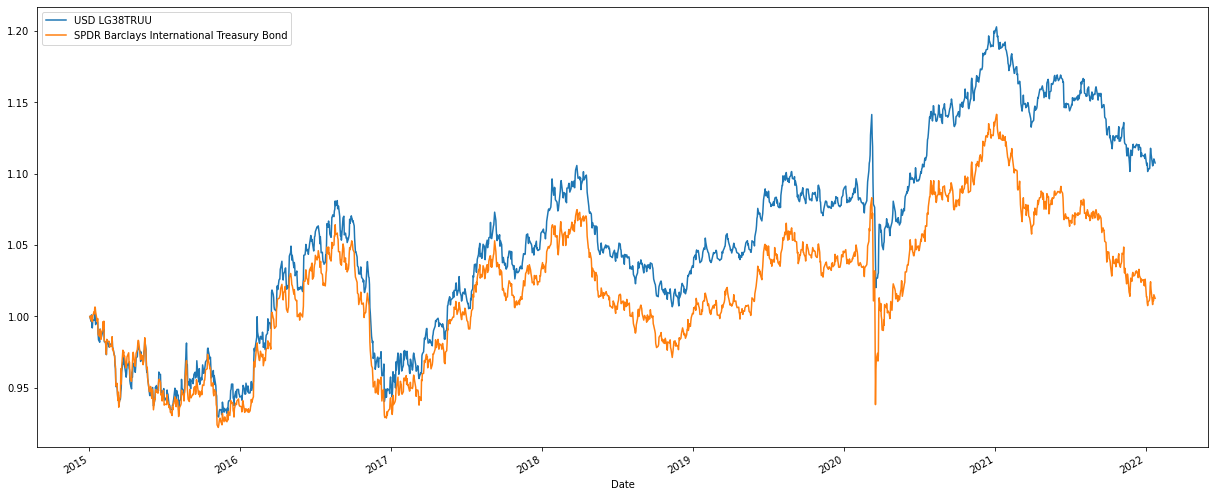

In [96]:
b = tot_df[a]
b = b.set_index('Date')
c = b /b.iloc[0]
c.plot(figsize = (21,9))